# Reducción de dimensiones

## Importaciones

### Librerías

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pylab as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
import umap.umap_ as umap

In [4]:
from src.chaging_functions import *
from src.exploring_functions import *

### Datos

In [5]:
train = pd.read_csv('/media/rodrigo/Rodrigo/train_modified.csv')
test = pd.read_csv('/media/rodrigo/Rodrigo/test_modified.csv')
donwcast_df(train)
donwcast_df(test)

Memory usage of properties dataframe is : 306.7017822265625  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  152.77874755859375  MB
This is  49.81345281056605 % of the initial size
Memory usage of properties dataframe is : 305.1759033203125  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  152.5880126953125  MB
This is  50.000019999992 % of the initial size


## PCA

Ahora se va a probar a hacer la reducción de dimensiones con PCA

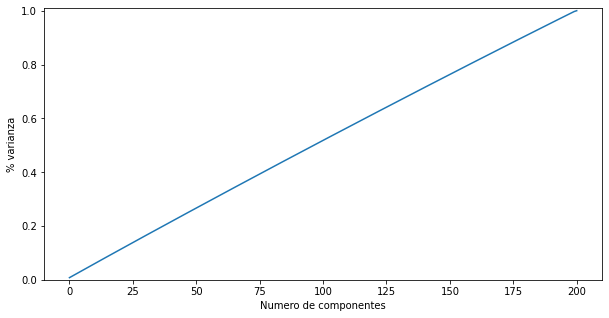

In [6]:
pca_visualize(train)

Se comprueba como con unas 160 dimensiones se puede explicar un 80% de la varianza, por lo que se van a reducir las dimensiones con PCA  a 160

In [7]:
target = train.target
train, test = pca_transform(train.drop(columns=['target']), test, 160)
train.insert(0, 'target', target)

In [8]:
train.to_csv('/media/rodrigo/Rodrigo/train_pca.csv', index=False)
test.to_csv('/media/rodrigo/Rodrigo/test_pca.csv', index=False)

Una vez se han reducido las dimensiones del dataframe con PCA, se van a reducir más con UMAP

## UMAP

### Datos modificados por PCA

#### Reducción a dos dimensiones sin target

In [9]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(train.drop(columns=['target']))

In [10]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.shape

(200000, 3)

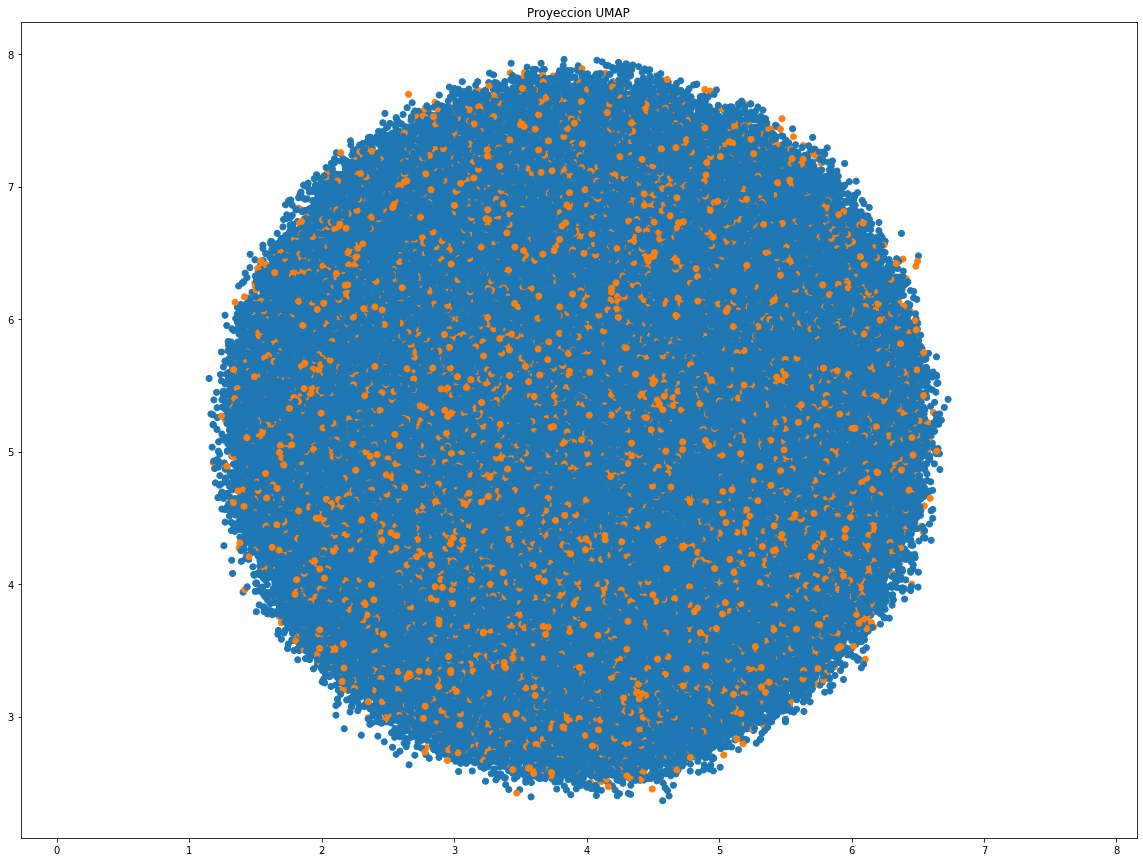

In [11]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Se ha clusterizado con umap el dataframe para reducirlo a 2 dimensiones y poder visualizarlo, pero se concluye que la clusterización no depende del taget, por lo que se va a dividir el dataframe de entrenamiento en dos partes para obligar a umap a clusterizar en función del target y comprobar si la clusterización permite o no predecir el target

#### Reducción a dos dimensiones con target

In [12]:
X = train.drop(columns=['target'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [13]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(X=X_train,y=y_train)

In [14]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [15]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,9.898404,-1.354470,0
1,12.140488,0.280336,0
2,9.460911,0.191693,0
3,7.549482,2.047713,1
4,12.603642,0.221110,0


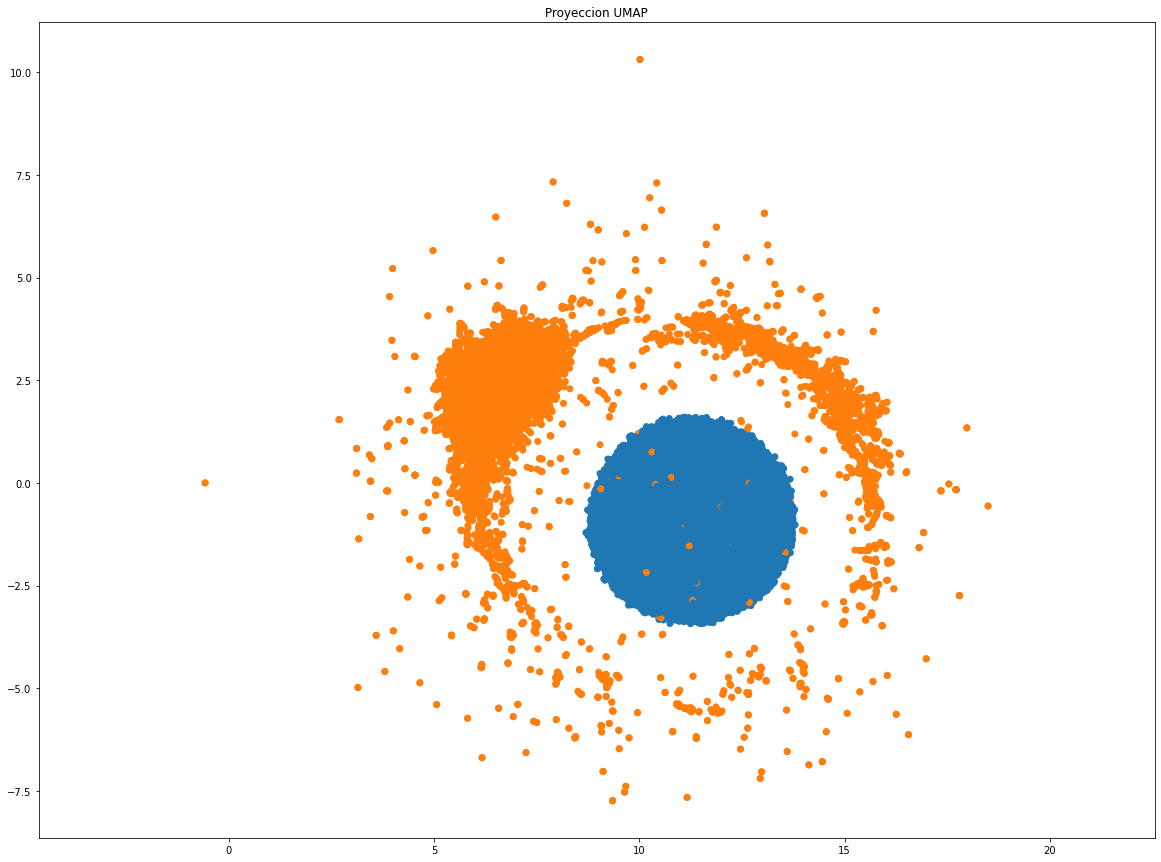

In [16]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [17]:
test_umap = umap.UMAP(n_components=2, metric='cosine').fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

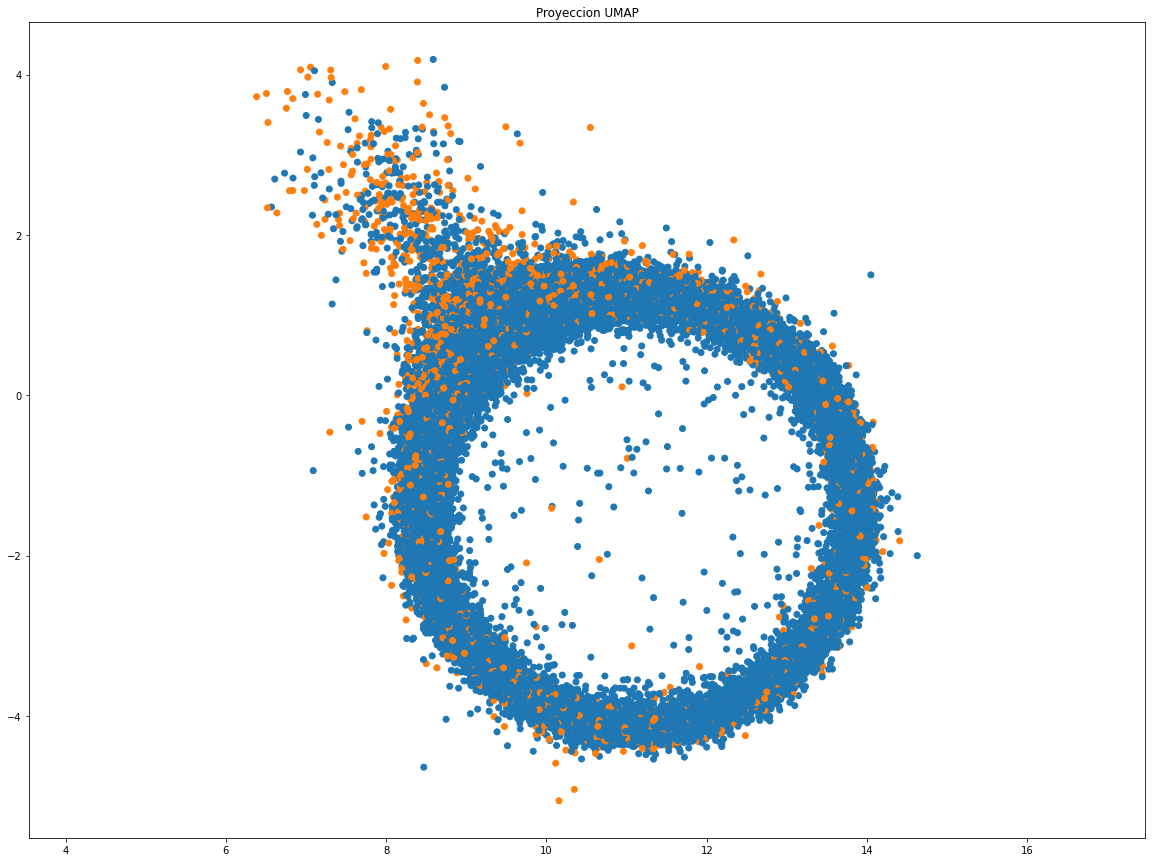

In [18]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buemas predicciones, se van a reducir las 160 dimensiones totales a 50 y se van a aplicar diferentes modelos para predecir los precios

#### Reducción a cincuenta dimensiones

In [19]:
train.head()

,target,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,0,-0.444409,0.131584,-0.377961,-1.129111,-0.599492,-0.634891,0.564721,-1.155759,-0.990338,...,-0.798106,-1.968160,1.406700,0.311439,-0.027220,-0.829675,2.317337,0.168822,-1.619806,-0.255555
1,0,2.210676,-0.295952,0.238851,0.714233,-0.036893,-1.080292,-0.594338,0.498631,1.546350,...,0.074981,1.277106,0.716239,-2.054784,-0.434757,-1.037782,-0.040305,-0.923748,-0.044323,-1.296534
2,0,-0.065659,-0.115391,-2.040533,-0.075524,-0.538937,-0.255048,-0.767106,0.039423,-1.225600,...,-0.711173,-0.899414,-0.111879,0.133638,0.176381,-0.301763,-1.672691,1.204852,-0.810744,-1.071010
3,0,1.368929,-0.158309,1.043792,-0.815960,-0.749660,-0.386559,-0.343573,0.684571,-1.147769,...,0.379653,-1.340014,0.324867,-0.162373,-1.614251,-1.763280,0.065290,-1.174678,0.253593,1.046381
4,0,0.552391,0.895766,0.798057,-0.547539,0.686026,0.444385,0.653605,0.945669,1.348569,...,-0.320129,1.105057,-0.113985,0.270499,0.878242,-0.818224,-0.389406,-1.355097,2.030187,-0.703275


In [20]:
train_umap = umap.UMAP(n_components=50, metric='cosine').fit_transform(train.drop(columns=['target']))

In [21]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.to_csv('/media/rodrigo/Rodrigo/train_umap.csv', index=False)

In [22]:
train_umap.head()

,target,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,6.140062,1.551255,6.141530,6.955902,3.406056,4.813793,4.448595,6.128876,7.628691,...,5.851144,5.403943,5.645264,5.419899,3.783017,3.936078,4.281768,3.459822,5.528029,6.160288
1,0,6.288717,1.648936,5.759735,7.199475,3.183510,4.911138,3.962261,6.242256,7.561774,...,5.694542,5.115111,5.568155,5.636168,4.267661,3.892161,4.204072,3.091354,5.739893,5.844206
2,0,6.135888,1.746322,5.708528,7.649740,3.289693,4.892858,4.278774,6.266607,7.630576,...,5.767913,5.197941,5.517132,5.106193,4.059174,3.779008,4.337518,3.362204,5.713427,5.967803
3,0,5.894550,1.808617,5.720509,7.106704,3.079608,4.967843,4.433145,6.318491,7.380964,...,5.564003,5.174112,5.507981,5.527777,4.219748,4.291563,4.397142,3.107880,5.421407,5.690331
4,0,6.063633,1.698269,5.394079,7.309355,3.298522,4.577740,4.299492,6.091950,7.476492,...,5.584447,5.165967,5.234626,5.395185,3.989546,3.926308,4.788320,3.101974,5.444384,6.015838


In [23]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1.336534,0.718367,-0.713525,0.519055,-1.364123,1.609842,-0.529823,-0.628379,0.228820,0.739586,...,-1.160755,-0.279337,-0.030351,-0.397337,-0.493534,0.513501,-2.114641,0.082105,-2.007858,0.949458
1,1.111848,0.119058,0.536096,0.586210,-1.238861,-0.897298,0.033204,-1.281453,-0.719975,0.109991,...,-1.862113,-0.538497,1.132353,-2.661701,-0.713765,-0.195420,-0.072675,0.541145,-0.205841,-1.237966
2,0.113924,-0.757140,-0.331268,-1.463880,-1.684153,-0.396302,-0.237792,0.009711,-0.639153,1.753772,...,0.666251,-0.035848,0.638924,-1.251124,-0.496833,-0.250311,2.264617,-0.195169,0.224930,-0.641749
3,1.011866,-0.382341,0.990059,-0.362179,1.169714,-0.610955,-0.129394,-0.791030,-0.578090,-2.077329,...,-0.272386,1.065868,0.144445,0.454854,-0.019961,-2.204801,-1.268329,0.659430,-0.268599,0.510549
4,0.208670,-0.890397,-0.334707,0.774653,0.801756,0.076523,-0.245415,-0.356138,0.403656,0.030906,...,-0.165882,-0.499444,-0.273058,1.076743,0.122891,0.771253,-0.760152,1.004011,2.243276,-1.953300


In [24]:
test_umap = umap.UMAP(n_components=50, metric='cosine').fit(X=train.drop(columns=['target'])).transform(X=test)

In [ ]:
test_umap = pd.DataFrame(test_umap)

In [ ]:
test_umap.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.517959,5.684722,4.464695,5.184043,4.665449,4.922988,4.970303,5.802377,5.281783,4.741971,...,4.960479,4.614135,5.404864,5.114674,5.415142,4.577125,5.160657,4.714718,4.543037,4.988754
1,3.268704,4.232221,4.583746,4.656871,4.645587,4.377311,4.604981,5.593156,5.223948,4.869727,...,4.994976,4.681235,5.367567,5.143870,5.350439,4.544437,5.217453,4.745854,4.465922,4.978706
2,7.612973,5.282360,5.209919,3.495034,5.415030,4.702322,4.833644,5.633666,5.299098,4.817223,...,4.951952,4.782793,5.344330,5.041044,5.300001,4.558415,5.248727,4.792778,4.401516,5.007510
3,4.562814,4.525200,4.676900,4.915673,4.318922,4.532945,4.498651,5.608347,5.276885,4.714563,...,4.968688,4.582967,5.423393,5.134917,5.414476,4.569108,5.186162,4.725140,4.549176,5.016582
4,7.390409,4.434159,4.727757,5.180822,4.646263,4.763058,5.219604,5.861217,5.233482,4.836862,...,5.002894,4.656166,5.347513,5.161112,5.374746,4.584096,5.172031,4.701325,4.509741,4.974921


In [ ]:
test_umap.to_csv('/media/rodrigo/Rodrigo/test_umap.csv', index = False)

### Datos sin modificar por PCA

In [ ]:
train = pd.read_csv('/media/rodrigo/Rodrigo/train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


#### Reducción a dos dimensiones con target

In [ ]:
X = train.drop(columns=['target', 'ID_code'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [ ]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(X=X_train,y=y_train)

In [ ]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [ ]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,0.740923,1.356928,0
1,-0.753400,-0.327206,0
2,0.224593,-1.385175,0
3,4.064515,3.885376,1
4,-0.807745,0.733686,0


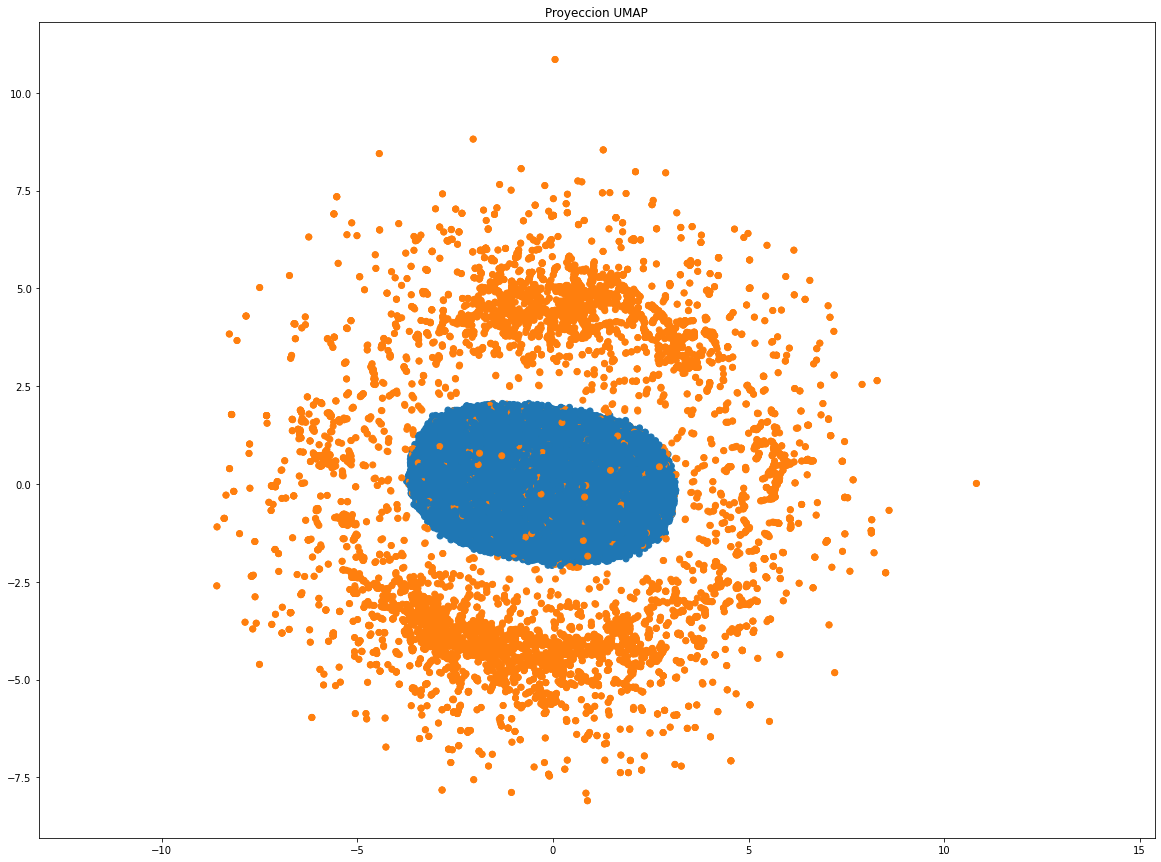

In [ ]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [ ]:
test_umap = umap.UMAP(n_components=2, metric='cosine').fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

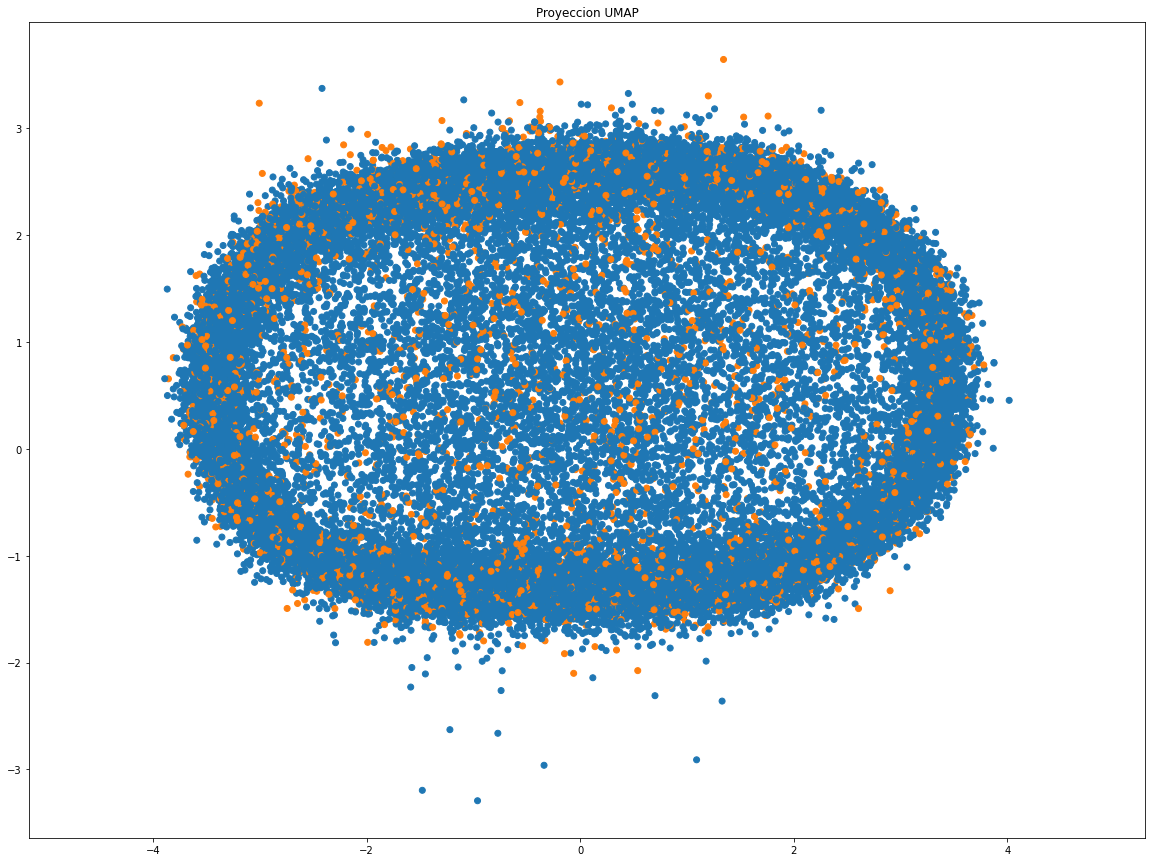

In [ ]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buenas predicciones